Distances =  [array([0.09163152, 1.01315668, 1.03325545, 1.08261406, 1.2586816 ,
       1.27302212, 1.40939597, 1.41833922, 1.42150282, 1.42305195])]
NeighboursIndexes =  [ 35980  90498  90852  33822  53491  15549  73945 106376  18134  36314]
songNames =  ['My Body Is a Cage', 'I Feel Pretty / Unpretty (Glee Cast Version)', 'Bad Things', 'Shadowboxer', 'Broken Wings - Single Version', 'Porcelain', 'Bittersweet Tragedy', 'Porcelain', 'Skyfall', 'Violet Hill']


c:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\musicRecommenderVenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<class 'numpy.ndarray'>


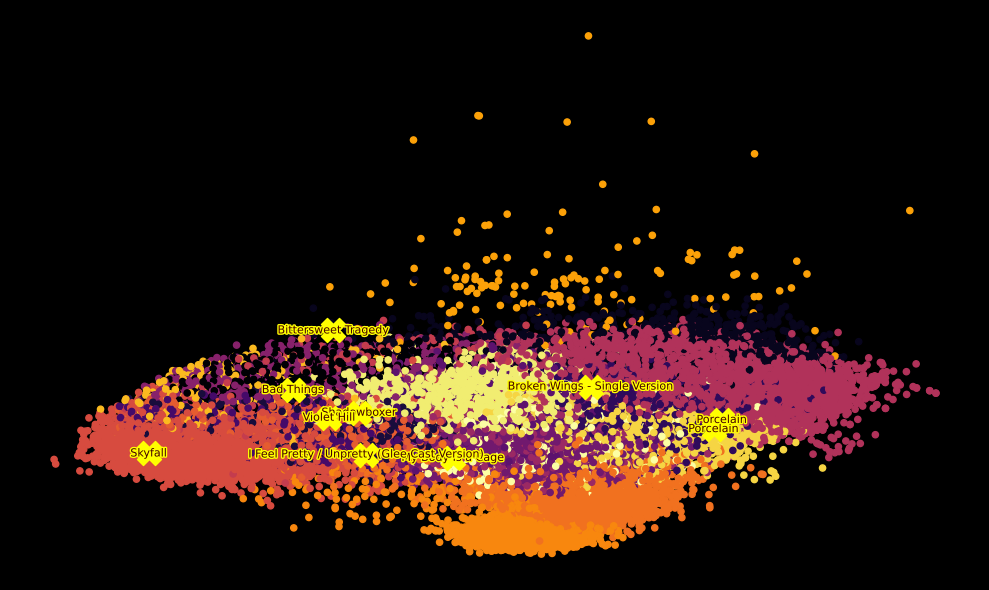

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import os
import datetime

# import time
# startTime = time.time()
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
from mySpotify import searchSong
# from plotManager import plotSongData


K_NEIGHBORS = 10
attributesToDrop = ["id", "artists", "name", "release_date"]

data = pd.read_csv("data.csv")
standardScaler = StandardScaler()
XRaw = data.drop(attributesToDrop, axis=1, inplace=False)
XHeaders = list(XRaw.keys())
XScaled = standardScaler.fit_transform(XRaw)
kn = NearestNeighbors(n_neighbors=K_NEIGHBORS)
kn.fit(XScaled)
songAttributesToDrop = ["artist", "name", "album", "time_signature"]


# , danceability, tempoValue, popularityValue, energyValue
def getRecomendations(songNameInput):  # , songsCountToReturn=10):
    orderedSongData = {}
    searchSongData = searchSong(songNameInput)
    for key in XHeaders:
        orderedSongData[key] = searchSongData[key]
    orderedSongDataPd = pd.DataFrame([orderedSongData])
    orderedSongDataScaled = standardScaler.transform(orderedSongDataPd)

    neighboursAndDistances = kn.kneighbors(orderedSongDataScaled, K_NEIGHBORS, return_distance=True)
    # neighboursIndexes = neighboursAndDistances[1]  # [neighbours]
    distances = neighboursAndDistances[0][0]
    neighboursIndexes = neighboursIndexes[1][0]
    
    ########################## CHANGED ##########################

    print("Distances = ", list(distances))
    print("NeighboursIndexes = ", neighboursIndexes)

    songData = []
    for neigbour in neighboursIndexes:
        # print(neigbour)
        dic = dict(data.iloc[neigbour])
        # print(type(dic))
        songData.append(dic)

    songNames = [song["name"] for song in songData]

    print("songNames = ", songNames)

    scaledNeighbours = XScaled[neighboursIndexes]
    plotSongData(XScaled, scaledNeighbours, songNames)
    return songData


def plotSongData(XScaled, songDatasScaled, songNames):
    song_cluster_pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=20, verbose=False))], verbose=False)
    song_cluster_pipeline.fit(XScaled)
    song_cluster_labels = song_cluster_pipeline.predict(XScaled)
    print(type(XScaled))

    pca_pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=2))])
    song_embedding = pca_pipeline.fit_transform(XScaled)
    projection = pd.DataFrame(columns=["x", "y"], data=song_embedding)
    plt.style.use("dark_background")
    plt.figure(figsize=(10, 6))
    cmap = "inferno"
    dot_size = 20
    plt.scatter(projection["x"], projection["y"], c=song_cluster_labels, cmap=cmap, s=dot_size)
    outputPlotPoints = pca_pipeline.fit_transform(songDatasScaled)
    outputPlotPoints

    for i, plotPoint in enumerate(outputPlotPoints):
        plt.scatter(plotPoint[0], plotPoint[1], c="yellow", s=300, marker="X")
        plt.text(plotPoint[0], plotPoint[1], songNames[i], color="#430000", fontsize=8, ha="center", va="center", path_effects=[pe.withStroke(linewidth=2, foreground="yellow")])

    imageName = f"plot.png"
    dateString = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    if os.path.exists(imageName):
        os.rename(imageName, f"plotOld_{dateString}.png")

    plt.axis("off")
    plt.tight_layout()
    plt.savefig(imageName, bbox_inches="tight", transparent=True)
    os.startfile(imageName)
    
    

if __name__ == "__main__":
    getRecomendations("My Body Is a Cage")




In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import os
import datetime

# import time
# startTime = time.time()
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
from mySpotify import searchSong
# from plotManager import plotSongData


K_NEIGHBORS = 10
attributesToDrop = ["id", "artists", "name", "release_date"]

data = pd.read_csv("data.csv")
standardScaler = StandardScaler()
XRaw = data.drop(attributesToDrop, axis=1, inplace=False)
XHeaders = list(XRaw.keys())
XScaled = standardScaler.fit_transform(XRaw)
kn = NearestNeighbors(n_neighbors=K_NEIGHBORS)
kn.fit(XScaled)
songAttributesToDrop = ["artist", "name", "album", "time_signature"]

songNameInput = "My Body Is a Cage"
# , danceability, tempoValue, popularityValue, energyValue

orderedSongData = {}
songData = searchSong(songNameInput)
for key in XHeaders:
    orderedSongData[key] = songData[key]
orderedSongDataPd = pd.DataFrame([orderedSongData])
orderedSongDataScaled = standardScaler.transform(orderedSongDataPd)

neighboursAndDistances = kn.kneighbors(orderedSongDataScaled, K_NEIGHBORS, return_distance=True)
neighboursIndexes = neighboursAndDistances[1]  # [neighbours]
distances = neighboursAndDistances[0]
neighboursIndexes = neighboursIndexes[0]

print("Distances = ", list(distances))
print("NeighboursIndexes = ", neighboursIndexes)


########################## TODO RENAME songData to ploral ##########################

songData = []
for neigbour in neighboursIndexes:
    # print(neigbour)
    dic = dict(data.iloc[neigbour])
    # print(type(dic))
    songData.append(dic)

songNames = [song["name"] for song in songData]

print("songNames = ", songNames)

scaledNeighbours = XScaled[neighboursIndexes]
    # plotSongData(XScaled, scaledNeighbours, songNames)
    # return songData


# def plotSongData(XScaled, songDatasScaled, songNames):
# song_cluster_pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=20, verbose=False))], verbose=False)
# song_cluster_pipeline.fit(XScaled)
# song_cluster_labels = song_cluster_pipeline.predict(XScaled)
# print(type(XScaled))

# pca_pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=2))])
# song_embedding = pca_pipeline.fit_transform(XScaled)
# projection = pd.DataFrame(columns=["x", "y"], data=song_embedding)
# plt.style.use("dark_background")
# plt.figure(figsize=(10, 6))
# cmap = "inferno"
# dot_size = 20
# plt.scatter(projection["x"], projection["y"], c=song_cluster_labels, cmap=cmap, s=dot_size)
# outputPlotPoints = pca_pipeline.fit_transform(songDatasScaled)
# outputPlotPoints

# for i, plotPoint in enumerate(outputPlotPoints):
#     plt.scatter(plotPoint[0], plotPoint[1], c="yellow", s=300, marker="X")
#     plt.text(plotPoint[0], plotPoint[1], songNames[i], color="#430000", fontsize=8, ha="center", va="center", path_effects=[pe.withStroke(linewidth=2, foreground="yellow")])

# imageName = f"plot.png"
# dateString = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# if os.path.exists(imageName):
#     os.rename(imageName, f"plotOld_{dateString}.png")

# plt.axis("off")
# plt.tight_layout()
# plt.savefig(imageName, bbox_inches="tight", transparent=True)
# os.startfile(imageName)
    
    

Distances =  [array([0.09163152, 1.01315668, 1.03325545, 1.08261406, 1.2586816 ,
       1.27302212, 1.40939597, 1.41833922, 1.42150282, 1.42305195])]
NeighboursIndexes =  [ 35980  90498  90852  33822  53491  15549  73945 106376  18134  36314]
songNames =  ['My Body Is a Cage', 'I Feel Pretty / Unpretty (Glee Cast Version)', 'Bad Things', 'Shadowboxer', 'Broken Wings - Single Version', 'Porcelain', 'Bittersweet Tragedy', 'Porcelain', 'Skyfall', 'Violet Hill']


In [24]:
# distances
# neighboursIndexes
myIndecies = list(neighboursIndexes)
myDistances = list(distances[0])

# print(myIndecies)
# print(myDistances)

# print(list(zip(myIndecies,myDistances)))

# for index,distance in zip(myIndecies,myDistances):
#     print(index,distance)
#     print(data.iloc[index]["name"])
#     print(data.iloc[index])

for song in songData:
    # print(song["name"])
    print(song)
    for key in song:
        print(key, song[key])
        
    #distances 
    



{'valence': 0.313, 'year': 2007, 'acousticness': 0.315, 'artists': "['Arcade Fire']", 'danceability': 0.296, 'duration_ms': 287240, 'energy': 0.502, 'explicit': 0, 'id': '1rOlTL4pKQ9Y1fURua4AJR', 'instrumentalness': 0.0551, 'key': 0, 'liveness': 0.229, 'loudness': -8.652999999999999, 'mode': 0, 'name': 'My Body Is a Cage', 'popularity': 62, 'release_date': '2007', 'speechiness': 0.0336, 'tempo': 81.045}
valence 0.313
year 2007
acousticness 0.315
artists ['Arcade Fire']
danceability 0.296
duration_ms 287240
energy 0.502
explicit 0
id 1rOlTL4pKQ9Y1fURua4AJR
instrumentalness 0.0551
key 0
liveness 0.229
loudness -8.652999999999999
mode 0
name My Body Is a Cage
popularity 62
release_date 2007
speechiness 0.0336
tempo 81.045
{'valence': 0.337, 'year': 2011, 'acousticness': 0.109, 'artists': "['Glee Cast']", 'danceability': 0.348, 'duration_ms': 239373, 'energy': 0.484, 'explicit': 0, 'id': '2kXnOV5df9njPkGKOiYDfr', 'instrumentalness': 0.0, 'key': 0, 'liveness': 0.125, 'loudness': -8.171, 'mo

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import os
import datetime

# import time
# startTime = time.time()
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd
from mySpotify import searchSong

# from plotManager import plotSongData


K_NEIGHBORS = 10
attributesToDrop = ["id", "artists", "name", "release_date"]

data = pd.read_csv("data.csv")
standardScaler = StandardScaler()
XRaw = data.drop(attributesToDrop, axis=1, inplace=False)
XHeaders = list(XRaw.keys())
XScaled = standardScaler.fit_transform(XRaw)
kn = NearestNeighbors(n_neighbors=K_NEIGHBORS)
kn.fit(XScaled)
songAttributesToDrop = ["artist", "name", "album", "time_signature"]


# , danceability, tempoValue, popularityValue, energyValue
def getRecomendations(songNameInput):  # , songsCountToReturn=10):
    orderedSongData = {}
    searchSongData = searchSong(songNameInput)
    for key in XHeaders:
        orderedSongData[key] = searchSongData[key]
    orderedSongDataPd = pd.DataFrame([orderedSongData])
    orderedSongDataScaled = standardScaler.transform(orderedSongDataPd)

    neighboursAndDistances = kn.kneighbors(orderedSongDataScaled, K_NEIGHBORS, return_distance=True)
    # neighboursIndexes = neighboursAndDistances[1]  # [neighbours]
    distances = neighboursAndDistances[0][0]
    neighboursIndexes = neighboursIndexes[1][0]

    ########################## CHANGED ##########################

    print("Distances = ", list(distances))
    print("NeighboursIndexes = ", neighboursIndexes)

    songData = []
    for neigbour in neighboursIndexes:
        # print(neigbour)
        dic = dict(data.iloc[neigbour])
        # print(type(dic))
        songData.append(dic)

    songNames = [song["name"] for song in songData]

    print("songNames = ", songNames)

    scaledNeighbours = XScaled[neighboursIndexes]
    plotSongData(XScaled, scaledNeighbours, songNames)
    return songData


def plotSongData(XScaled, songDatasScaled, songNames):
    song_cluster_pipeline = Pipeline([("scaler", StandardScaler()), ("kmeans", KMeans(n_clusters=20, verbose=False))], verbose=False)
    song_cluster_pipeline.fit(XScaled)
    song_cluster_labels = song_cluster_pipeline.predict(XScaled)
    print(type(XScaled))

    pca_pipeline = Pipeline([("scaler", StandardScaler()), ("PCA", PCA(n_components=2))])
    song_embedding = pca_pipeline.fit_transform(XScaled)
    projection = pd.DataFrame(columns=["x", "y"], data=song_embedding)
    plt.style.use("dark_background")
    plt.figure(figsize=(10, 6))
    cmap = "inferno"
    dot_size = 20
    plt.scatter(projection["x"], projection["y"], c=song_cluster_labels, cmap=cmap, s=dot_size)
    outputPlotPoints = pca_pipeline.fit_transform(songDatasScaled)
    outputPlotPoints

    # for i, plotPoint in enumerate(outputPlotPoints):
    #     plt.scatter(plotPoint[0], plotPoint[1], c="yellow", s=300, marker="X")
    #     plt.text(plotPoint[0], plotPoint[1], songNames[i], color="#430000", fontsize=8, ha="center", va="center", path_effects=[pe.withStroke(linewidth=2, foreground="yellow")])

    imageName = f"defaultPlot.png"
    dateString = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    if os.path.exists(imageName):
        os.rename(imageName, f"plotOld_{dateString}.png")

    plt.axis("off")
    plt.tight_layout()
    plt.savefig(imageName, bbox_inches="tight", transparent=True)
    # os.startfile(imageName)


if __name__ == "__main__":
    getRecomendations("My Body Is a Cage")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\musicRecommenderVenv\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\krott\AppData\Local\Temp\ipykernel_10348\3162682205.py", line 102, in <module>
    getRecomendations("My Body Is a Cage")
  File "C:\Users\krott\AppData\Local\Temp\ipykernel_10348\3162682205.py", line 37, in getRecomendations
    searchSongData = searchSong(songNameInput)
  File "c:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\LeanderNew\mySpotify.py", line 63, in searchSong
    print("-------------------")
KeyError: 'tracks'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\krott\Documents\[Github]\assistance-systems-recommendation-system\musicRecommenderVenv\lib\site-packages\IPython\core\interactiveshell.